In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Central tendancy: Median

In [14]:
median_ssc_p = data['ssc_p'].median()
median_ssc_p

67.0

In [19]:
median_etest_p = data['etest_p'].median()
median_etest_p

71.0

In [18]:
median_degree_p = data['degree_p'].median()
median_degree_p

66.0

In [17]:
median_hsc_p = data['hsc_p'].median()
median_hsc_p

65.0

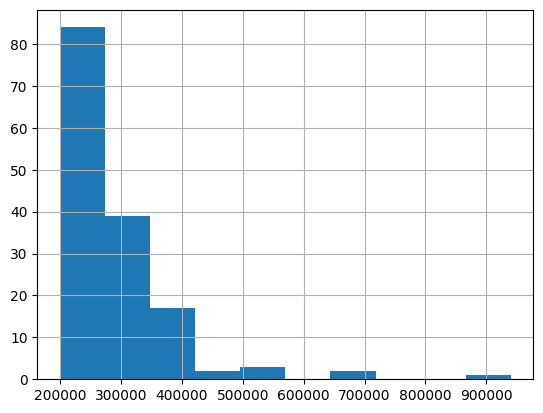

In [22]:
histogram_salary= data['salary'].hist()

In [29]:
data.salary.describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Histogram of Salary')

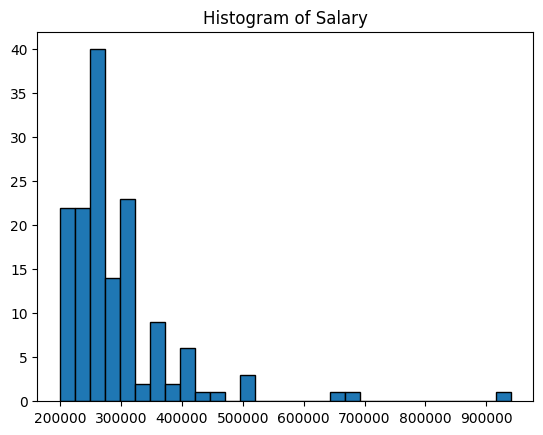

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['salary'], bins=30, edgecolor='black')
plt.title('Histogram of Salary')

Histogram reveal that most of people have salary in between 20k to 30k

In [44]:
corelation_coeff=data[['ssc_p','hsc_p','degree_p','etest_p']].corr()
corelation_coeff

,ssc_p,hsc_p,degree_p,etest_p
ssc_p,1.000000,0.511472,0.538404,0.261993
hsc_p,0.511472,1.000000,0.434206,0.245113
degree_p,0.538404,0.434206,1.000000,0.224470
etest_p,0.261993,0.245113,0.224470,1.000000


yes the correlation in between :
ssc_p and hsc_p,
ssc_p and degree_p

In [56]:
#missing value
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [54]:
data.shape

(215, 15)

In [57]:
# mean imputation for salary column
salary_values = data['salary'].mean()
data['salary'].fillna(salary_values, inplace=True)

In [58]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Text(0.5, 1.0, 'Boxplot of Salary')

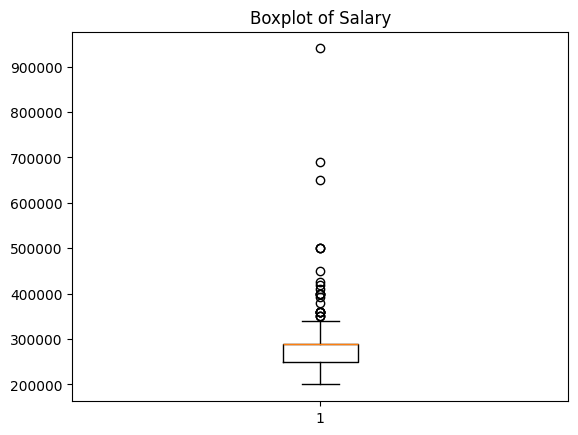

In [59]:
# Checking outliers using boxplot for salary
import matplotlib.pyplot as plt
plt.boxplot(data['salary'])
plt.title('Boxplot of Salary')

In [60]:
# handling outliers by capping
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['salary'] = np.where(data['salary'] < lower_bound, lower_bound,
                           np.where(data['salary'] > upper_bound, upper_bound, data['salary']))

Text(0.5, 1.0, 'Boxplot of Salary')

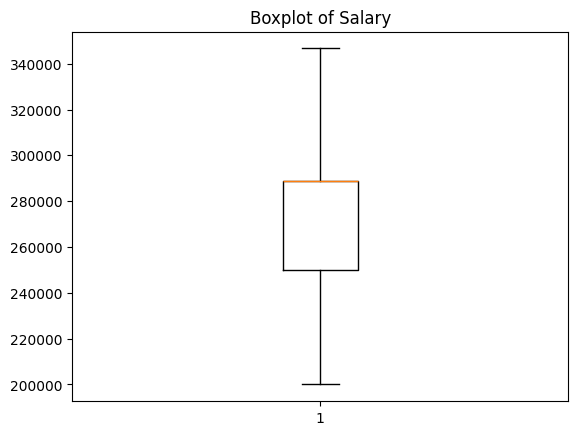

In [61]:
plt.boxplot(data['salary'])
plt.title('Boxplot of Salary')

In [64]:
data.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.000000,True,True,True,True,False,False,True,False,True,True
1,2,79.33,78.33,77.48,86.5,66.28,200000.000000,True,False,True,False,True,False,True,True,False,True
2,3,65.00,68.00,64.00,75.0,57.80,250000.000000,True,False,False,False,False,False,False,False,False,True
3,4,56.00,52.00,52.00,66.0,59.43,288655.405405,True,False,False,False,True,False,True,False,True,False
4,5,85.80,73.60,73.30,96.8,55.50,346638.513514,True,False,False,True,False,False,False,False,False,True


In [84]:
# convert categorical columns to numerical using one-hot encoding
data=pd.get_dummies(data, columns=None, dtype='int')
data.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.000000,True,True,True,True,False,False,True,False,True,True
1,2,79.33,78.33,77.48,86.5,66.28,200000.000000,True,False,True,False,True,False,True,True,False,True
2,3,65.00,68.00,64.00,75.0,57.80,250000.000000,True,False,False,False,False,False,False,False,False,True
3,4,56.00,52.00,52.00,66.0,59.43,288655.405405,True,False,False,False,True,False,True,False,True,False
4,5,85.80,73.60,73.30,96.8,55.50,346638.513514,True,False,False,True,False,False,False,False,False,True


In [85]:
education_gap= data['degree_p'] - data['hsc_p']
data['education_gap'] = education_gap

In [86]:
education_gap

0     -33.00
1      -0.85
2      -4.00
3       0.00
4      -0.30
       ...  
210    -4.40
211    12.00
212     6.00
213    -8.00
214    -5.00
Length: 215, dtype: float64

In [89]:
# check data type of each column
data.dtypes

sl_no                      int64
ssc_p                    float64
hsc_p                    float64
degree_p                 float64
etest_p                  float64
mba_p                    float64
salary                   float64
gender_M                    bool
ssc_b_Others                bool
hsc_b_Others                bool
hsc_s_Commerce              bool
hsc_s_Science               bool
degree_t_Others             bool
degree_t_Sci&Tech           bool
workex_Yes                  bool
specialisation_Mkt&HR       bool
status_Placed               bool
education_gap            float64
dtype: object

In [90]:
data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed,education_gap
0,1,67.00,91.00,58.00,55.0,58.80,270000.000000,True,True,True,True,False,False,True,False,True,True,-33.00
1,2,79.33,78.33,77.48,86.5,66.28,200000.000000,True,False,True,False,True,False,True,True,False,True,-0.85
2,3,65.00,68.00,64.00,75.0,57.80,250000.000000,True,False,False,False,False,False,False,False,False,True,-4.00
3,4,56.00,52.00,52.00,66.0,59.43,288655.405405,True,False,False,False,True,False,True,False,True,False,0.00
4,5,85.80,73.60,73.30,96.8,55.50,346638.513514,True,False,False,True,False,False,False,False,False,True,-0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,346638.513514,True,True,True,True,False,False,False,False,False,True,-4.40
211,212,58.00,60.00,72.00,74.0,53.62,275000.000000,True,True,True,False,True,False,True,False,False,True,12.00
212,213,67.00,67.00,73.00,59.0,69.72,295000.000000,True,True,True,True,False,False,False,True,False,True,6.00
213,214,74.00,66.00,58.00,70.0,60.23,204000.000000,False,True,True,True,False,False,False,False,True,True,-8.00


In [101]:
df = pd.DataFrame(data)


categorical_columns = df.select_dtypes(include=['bool']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded: \n{df_encoded}")

Encoded: 
     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p         salary  \
0        1  67.00  91.00     58.00     55.0  58.80  270000.000000   
1        2  79.33  78.33     77.48     86.5  66.28  200000.000000   
2        3  65.00  68.00     64.00     75.0  57.80  250000.000000   
3        4  56.00  52.00     52.00     66.0  59.43  288655.405405   
4        5  85.80  73.60     73.30     96.8  55.50  346638.513514   
..     ...    ...    ...       ...      ...    ...            ...   
210    211  80.60  82.00     77.60     91.0  74.49  346638.513514   
211    212  58.00  60.00     72.00     74.0  53.62  275000.000000   
212    213  67.00  67.00     73.00     59.0  69.72  295000.000000   
213    214  74.00  66.00     58.00     70.0  60.23  204000.000000   
214    215  62.00  58.00     53.00     89.0  60.22  288655.405405   

     education_gap  gender_M_False  gender_M_True  ...  degree_t_Others_False  \
0           -33.00             0.0            1.0  ...                    1.0   

In [104]:
# Normalization using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
df_encoded[numerical_cols] = scaler.fit_transform(data[numerical_cols])
df_encoded.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,education_gap,gender_M_False,gender_M_True,...,degree_t_Others_False,degree_t_Others_True,degree_t_Sci&Tech_False,degree_t_Sci&Tech_True,workex_Yes_False,workex_Yes_True,specialisation_Mkt&HR_False,specialisation_Mkt&HR_True,status_Placed_False,status_Placed_True
0,1,0.538240,0.889621,0.195122,0.104167,0.284483,270000.000000,-33.00,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2,0.792414,0.680890,0.670244,0.760417,0.564843,200000.000000,-0.85,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3,0.497011,0.510708,0.341463,0.520833,0.247001,250000.000000,-4.00,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4,0.311482,0.247117,0.048780,0.333333,0.308096,288655.405405,0.00,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,5,0.925788,0.602965,0.568293,0.975000,0.160795,346638.513514,-0.30,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [116]:
# EDA between gender and placement status
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='status', hue='gender', data=df_encoded)

plt.show()


ValueError: Could not interpret value `status` for `x`. An entry with this name does not appear in `data`.

In [111]:
# Graph between board of placememt (SSC_B and HSC_B) and placement status
sns.countplot(x='status', hue='ssc_b', data=df_encoded)
sns.countplot(x='status', hue='hsc_b', data=df_encoded)
plt.show()




ValueError: Could not interpret value `status` for `x`. An entry with this name does not appear in `data`.